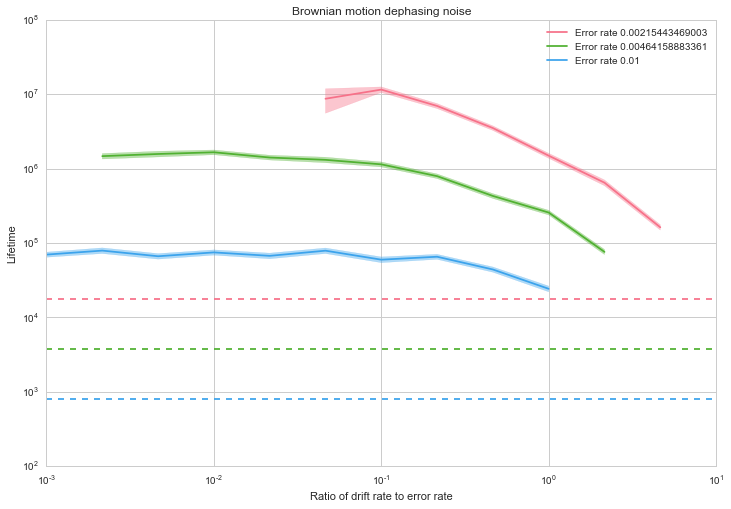

In [46]:
% matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
sns.set_style("whitegrid")

df = pd.concat([pd.read_csv(fname) for fname in glob("data/*.csv")])
df.columns = ["error", "drift", "time", "exit"]
df["ratio"] = df["drift"] / df["error"]

v = df.pivot_table(index="error", columns="ratio", values="time", aggfunc=pd.DataFrame.mean)
s = df.pivot_table(index="error", columns="ratio", values="time", aggfunc=pd.DataFrame.sem)
n = df.pivot_table(index="error", columns="ratio", values="time", aggfunc=pd.DataFrame.count)

pal = sns.color_palette("husl", len(v))
plt.figure(figsize=(12, 8))
for idx, error_rate in enumerate(v.index):
    x = v.loc[error_rate, :].index
    y = v.loc[error_rate, :].values
    d = s.loc[error_rate, :].values
    sel = ~np.isnan(y)
    x = x[sel]
    y = y[sel]
    d = d[sel]
    plt.loglog(x, y, label="Error rate " + str(error_rate), color=pal[idx])
    plt.fill_between(x, y - d, y + d, color=pal[idx], alpha=0.4)
    plt.axhline(16.0/(63.0 * 3.141592 * (error_rate ** 2)), ls="--", color=pal[idx])

plt.title("Brownian motion dephasing noise")
plt.ylabel("Lifetime")
plt.xlabel("Ratio of drift rate to error rate")
plt.legend()